In [2]:
import numpy as np
import matplotlib.pyplot as plt

Define the input data and output

In [3]:
# 2 bits data
x_2bits = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([[0, 1, 1, 1]]).T
y_xor = np.array([[0, 1, 1, 0]]).T
y_and = np.array([[0, 0, 0, 1]]).T
y_1bit = np.array([[0, 0, 1, 1]]).T
# 3 bits data
x_3bits = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_decoder = np.array([[1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0],
                      [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1]])

Neural Network Class
  in_nodes  - number of input nodes
  out_nodes - number of output nodes

In [4]:
class NeuralNet():
    def __init__(self, in_nodes, out_nodes):
        # save node counts
        self.__errvals = []
        self.__nodes = np.array([in_nodes, out_nodes])
        
        # set initial weights - choose method manually (end results are the same for the data used here)
        # but different initial weights can generate different error value curves
        #self.__weights = np.random.random((in_nodes + 1, out_nodes)) * 2 - 1
        #self.__weights = np.ones((in_nodes + 1, out_nodes))
        self.__weights = np.zeros((in_nodes + 1, out_nodes))
        
    def train(self, x, yTarget, iterations=1000):
        # add bias inputs, 1, to input data to allow treating all biases as weights
        # will create a copy of the input data which could be wasteful for large datasets
        x = np.insert(x, self.__nodes[0], 1, axis=1)
        xT = x.T
        
        # run reasonable amount of iterations for training to take place
        self.__errvals = []
        for i in range(iterations):
            # get calculated output value, y - [inputRows, outputNodes]
            y = self.__getOutput(x)
            # get difference between expected and calculated, save for graph
            err = yTarget - y
            self.__errvals.append(err)
            # calculate adjustments and adjust weights accodingly - [inputNodes+1, outputNodes]
            wadj = np.dot(xT, err * self.__dsigmoid(y))
            self.__weights += wadj
            
    def getY(self, x):
        x = np.insert(x, self.__nodes[0], 1)
        if self.__nodes[1] <= 1:
            return self.__getOutput(x)
        else:
            return self.__softmax(self.__getOutput(x))
    def getYsigmoid(self, x):
        x = np.insert(x, self.__nodes[0], 1)
        return self.__getOutput(x)
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def dsigmoid(self, y):
        return y * (1 - y)

    def display_properties(self):
        print("\nInput Nodes: {}".format(self.__nodes[0]))
        print("Output Nodes: {}".format(self.__nodes[1]))
        print("Weights (last one is bias):\n{}".format(self.__weights))

    # plot error values over training iterations for requested output node
    def plot_errors(self, node=0):
        handles = []
        labels = []
        # print("err: {}".format(self.__errvals[len(self.__errvals) - 1][node]))
        # xvals are for the training iterations
        xvals = range(len(self.__errvals))
        for i in range(len(self.__errvals[0])):
            yvals = []
            # yvals are for the error values of requested output 'node'
            for xerr in self.__errvals:
                yvals.append(xerr[i][node])
            plot, = plt.plot(xvals, yvals)
            handles.append(plot)
            labels.append("Training Input {}".format(i))
        plt.title("Output Node Error Values vs Training Iterations")
        plt.xlabel("Training Iterations")
        plt.ylabel("Error Value (yTarget - Ycalculated)")
        plt.axhline(y=0, color='black')
        plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    
    #
    # internal functions
    #
    def __softmax(self, y):
        expy = np.exp(y)
        return expy / np.sum(expy, axis=0)
    def __getOutput(self, x):
        return self.__sigmoid(np.dot(x, self.__weights))
    def __getWeights(self):
        return self.__weights
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __dsigmoid(self, y):
        return y * (1 - y)



Create, train, and test neural network for 2 bits data


Input Nodes: 2
Output Nodes: 1
Weights (last one is bias):
[[ 6.17978334]
 [ 6.17978334]
 [-2.84372617]]

Network test for 2 bit OR gate:
[0 0] = [ 0.05500653]
[0 1] = [ 0.96564528]
[1 0] = [ 0.96564528]
[1 1] = [ 0.99992633]

Single output error values:


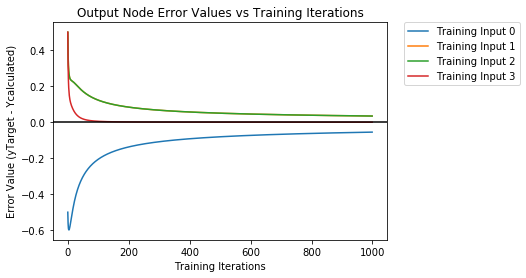

Note that multiple training inputs may trace over the same line




In [5]:
# create network 
nn = NeuralNet(2, 1)
# train network using x,y 2 bits data - change y_? for different tests
nn.train(x_2bits, y_or)
# display network properties including calculated weights
nn.display_properties()
# test network and display results
print("\nNetwork test for 2 bit OR gate:")
for x in x_2bits:
    print("{} = {}".format(x, nn.getY(x)))
# plot errors for single output node
print("\nSingle output error values:")
nn.plot_errors()
print("Note that multiple training inputs may trace over the same line")
print("\n")

Create, train, and test neural network for 3 bits data


Input Nodes: 3
Output Nodes: 8
Weights (last one is bias):
[[ -5.97904885  -6.08044425  -6.08044425  -5.83321445   5.86496239
    5.33268426   5.33268426   4.77789722]
 [ -5.97904885  -6.08044425   5.86496239   5.33268426  -6.08044425
   -5.83321445   5.33268426   4.77789722]
 [ -5.97904885   5.86496239  -6.08044425   5.33268426  -6.08044425
    5.33268426  -5.83321445   4.77789722]
 [  2.65063445  -3.12038944  -3.12038944  -8.16099865  -3.12038944
   -8.16099865  -8.16099865 -12.18163878]]

Network test for 3 bit DECODER:
[0 0 0] = 0
[  9.34050084e-01   4.22740018e-02   4.22740018e-02   2.85495529e-04
   4.22740018e-02   2.85495529e-04   2.85495529e-04   5.12364787e-06]
[0 0 1] = 1
[  3.46091683e-02   9.39606118e-01   1.00945010e-04   5.58131594e-02
   1.00945010e-04   5.58131594e-02   8.36353943e-07   6.08599379e-04]
[0 1 0] = 2
[  3.46091683e-02   1.00945010e-04   9.39606118e-01   5.58131594e-02
   1.00945010e-04   8.36353943e-07   5.58131594e-02   6.08599379e-04]
[0 1 1] = 3
[  9.

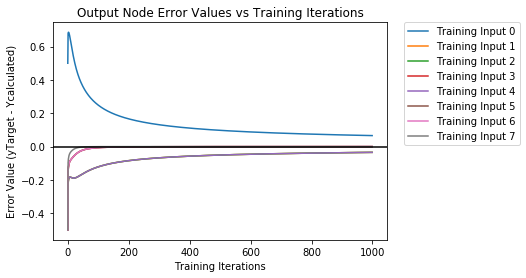


Output node 3 error values:


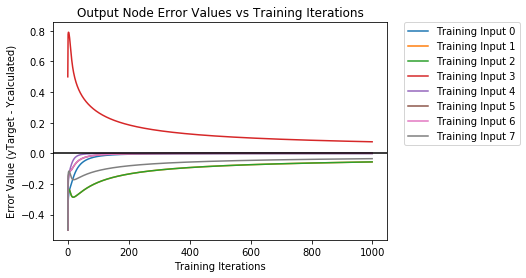


Output node 7 error values:


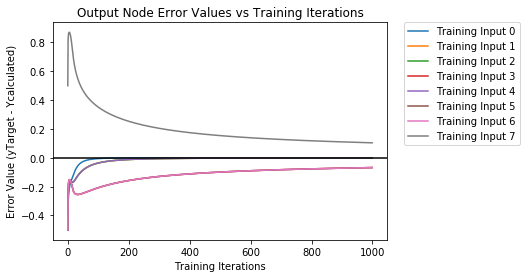

Note that multiple training inputs may trace over the same line




In [6]:
# create network 
nn = NeuralNet(3, 8)
# train network using x,y 3 bits data
nn.train(x_3bits, y_decoder)
# display network properties including calculated weights
nn.display_properties()
# test network and display results
print("\nNetwork test for 3 bit DECODER:")
for x in x_3bits:
    print("{} = {}\n{}".format(x, np.argmax(nn.getY(x)), nn.getYsigmoid(x)))
# plot errors for single output node
print("\nOutput node 0 error values:")
nn.plot_errors(0)
print("\nOutput node 3 error values:")
nn.plot_errors(3)
print("\nOutput node 7 error values:")
nn.plot_errors(7)
print("Note that multiple training inputs may trace over the same line")
print("\n")

<b>Softmax</b>
<blockquote>
Quoted from Wikipedia:<br/>

The softmax function, or normalized exponential function, is a generalization of the logistic function that "squashes" a K-dimensional vector $\mathbf {z}$ of arbitrary real values to a K-dimensional vector $\sigma (\mathbf {z} )$ of real values in the range [0, 1] that add up to 1. The function is given by


$\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}$    for j = 1, …, K.


In probability theory, the output of the softmax function can be used to represent a categorical distribution – that is, a probability distribution over K different possible outcomes. In fact, it is the gradient-log-normalizer of the categorical probability distribution.
</blockquote>
<b>Refresher</b>
<ul>
<li>Inverse of $e^x$ is $ln(x)$, derivative of $e^x$ is $e^x$, derivative of $ln(x)$ is $1/x$</li>
<li>$e^0 = 1$,  $e^1 = e$,  and $ln(e) = 1$</li>
<li>${e^{\ln x}=x\qquad {\text{if }}x>0}$</li>
<li>$\ln(e^{x})=x$</li>
</ul>   
<b>Note difference in results of input values, with same ratio, due to its exponential nature:</b>
<ul>
<li>softmax for [0.9, 0.1, 0.1, 0.1] = [ 0.42589676        0.19136775       0.19136775       0.19136775]</li>
<li>softmax for [9,     1,   1,   1] = [ 9.98994624e-01    3.35125362e-04   3.35125362e-04   3.35125362e-04]</li>
</ul>

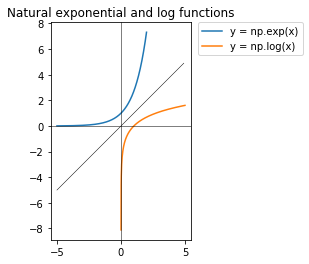

In [7]:
# display np.exp(x) and np.log(x) graphs
handles = []
labels = []
# plot asymptope
xvals = np.arange(-5, 5, 0.1)
plt.plot(xvals, xvals, color='black', linewidth=0.5)
# plot np.exp(x)
xvals = np.arange(-5, 2, 0.01)
yvals = [np.exp(x) for x in xvals]
plot, = plt.plot(xvals, yvals)
handles.append(plot)
labels.append("y = np.exp(x)")
# plot ln(x)
xvals = np.arange(0.0003, 5, 0.01)
yvals = [np.log(x) for x in xvals]
plot, = plt.plot(xvals, yvals)
handles.append(plot)
labels.append("y = np.log(x)")
# plot axis and legend
plt.axes().set_aspect('equal')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title("Natural exponential and log functions")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<b>Sigmoid Function and Logistic Neuron</b>
<blockquote>
Quoted from Wikipedia:<br/>

A sigmoid function is a mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Often, sigmoid function refers to the special case of the logistic function defined by the formula

$\displaystyle {S(x) =} {\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}$

</blockquote>
<b>Refresher</b>
<ul>
<li>For a logistic neuron $z = b + \sum\limits_{\substack{i}} x_i w_i$ 
where $\displaystyle \frac{\partial z}{\partial w_i}=x_i$ and $\displaystyle \frac{\partial z}{\partial x_i}=w_i$, 
and the output<br/>
$\displaystyle y = {\frac {1}{1+e^{-z}}}$ where $\displaystyle {\frac {dy}{dz}} = y * (1 - y)$<br/><br/></li>
<li>The error can be determinded using the squared difference between the target output, $t$, and the calculated output, $y$, summed over all training cases:<br/><br/>
$\displaystyle E = \frac {1}{2} \sum\limits_{\substack{n}} (t^n - y^n)^2$<br/><br/>
</li>
</ul> 

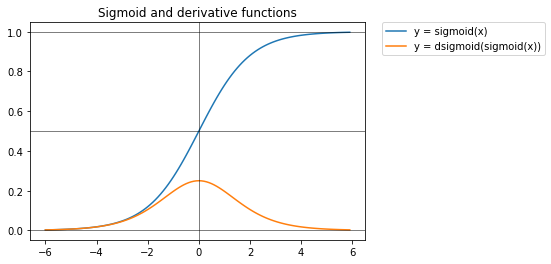

In [8]:
# display sigmoid and derivative graphs
handles = []
labels = []
# plot sigmoid
xvals = np.arange(-6, 6, 0.1)
yvals = [nn.sigmoid(x) for x in xvals]
plot, = plt.plot(xvals, yvals)
handles.append(plot)
labels.append("y = sigmoid(x)")
# plot derivative of sigmoid
yvals = [nn.dsigmoid(y) for y in yvals]
plot, = plt.plot(xvals, yvals)
handles.append(plot)
labels.append("y = dsigmoid(sigmoid(x))")
# plot axis and legend
plt.axhline(y=1, color='black', linewidth=0.5)
plt.axhline(y=0.5, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title("Sigmoid and derivative functions")
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
%%javascript
element.append("<div id='chart1'>Is there anyone there?</div>");

<IPython.core.display.Javascript object>